In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib as mpl

# Best Practices Forward Modelling

## Tutorial ini mengikuti materi yang berasal dari buku Pak Grandis, "Pengantar Pemodelan Inversi Geofisika"

### Iqram Haris Fahromi / NIM 12320021

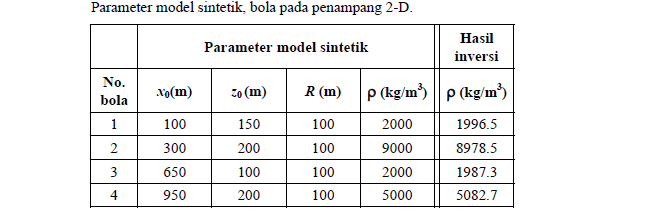

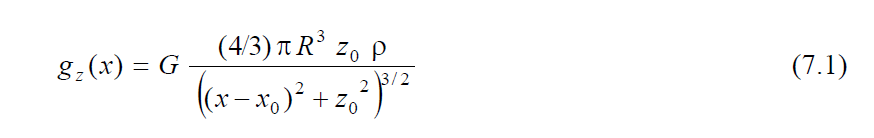

G = 6.6x10^-11. R = jari-jari bola. (x0,z0) adalah poisisi titik pusat massa bola dalam ara sumbu x (horisontal) dan sumbu z (vertikal atau kedalaman) dan rho adalah rapat massa bola.

In [2]:
G = 6.67e-11 # SI (m^3 kg^-1 s^-2)

# parameter model sintetik
x0 = 100 # m
z0 = 150 # m
R = 100 # m
rho = 2000 # kg/m3

In [3]:
# variabel bebas x
x = np.arange(0,1001,20)

In [4]:
# fungsi forward modelling bola homogen
def f(x0, z0, R, rho):
    gz = G*((4/3)*np.pi*(R**3)*z0*rho)/(((x-x0)**2+(z0**2))**(3/2))
    return gz

gz1 = f(x0, z0, R, rho)
gz2 = f(300,200,100,9000)
gz3 = f(650,100,100,2000)
gz4 = f(950,200,100,5000)

gz_tot = gz1 + gz2 + gz3 + gz4 # 1 mGal = 10^-5 m/s^2

# menambahkan noise
rng = np.random.default_rng(seed=10)
noise = rng.uniform(-0.000001, 0.000001, len(gz_tot))

gz_tot_noise = gz_tot + noise

# menghitung misfit
misfit = np.sum((gz_tot_noise-gz_tot)**2)
print("misfit : ",misfit)

misfit :  1.5816016016500015e-11


In [5]:
# fungsi bola homogen
def bola_homogen(x0, z0, R):
    q = np.linspace(0,2*np.pi,1000)

    xSphere = R*np.cos(q)+x0
    zSphere = R*np.sin(q)-z0
    
    return xSphere, zSphere

xb1,yb1 = bola_homogen(100,150,100)
xb2,yb2 = bola_homogen(300,200,100)
xb3,yb3 = bola_homogen(650,100,100)
xb4,yb4 = bola_homogen(950,200,100)

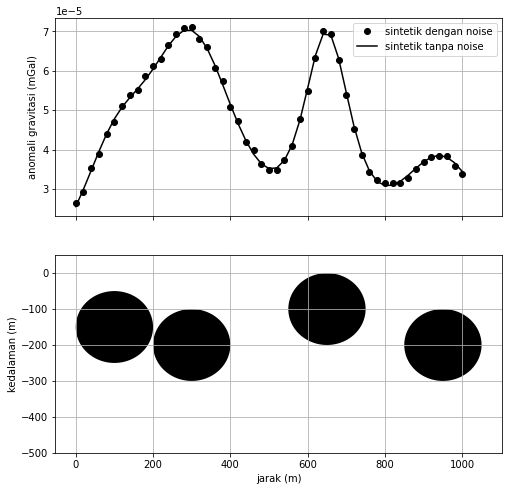

In [6]:
# plotting
fig, (ax1, ax2) = plt.subplots(2, 1, sharex = True, figsize=(8,8))

ax1.plot(x,gz_tot_noise, 'ko', label="sintetik dengan noise")
ax1.plot(x,gz_tot, 'k-', label="sintetik tanpa noise")
ax1.set_ylabel("anomali gravitasi (mGal)")
ax1.legend()

ax2.fill(xb1,yb1,'k')
ax2.fill(xb2,yb2,'k')
ax2.fill(xb3,yb3,'k')
ax2.fill(xb4,yb4,'k')
ax2.set_ylim(-500,50)
ax2.set_ylabel("kedalaman (m)")

#plt.xlim(0,1000)
ax1.grid()
ax2.grid()
plt.xlabel("jarak (m)")
plt.show()
#fig.savefig('2D.png')

# Testing 3D

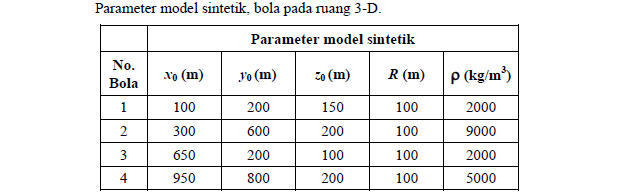

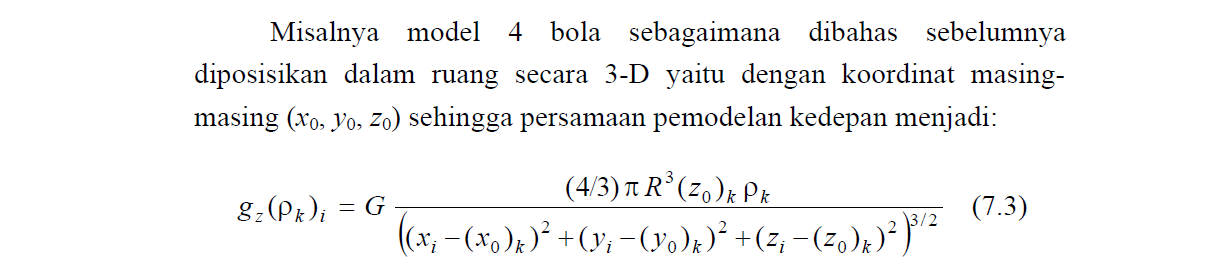

In [7]:
zi = np.array([0 for i in range(0, 1001, 20)])
xi = np.arange(0,1001,20)
yi = np.arange(0,1001,20)


# fungsi forward modelling bola homogen 3D
def f3d(x0, y0, z0, R, rho):
    Xi,Yi = np.meshgrid(xi,yi)
    
    gz3d = G*(((4/3)*np.pi*(R**3)*z0*rho)/(((Xi-x0)**2+(Yi-y0)**2+(zi-z0)**2)**(3/2)))
    return Xi,Yi,gz3d

x1,y1,gz3d1 = f3d(100,200,150,100,2000)
x2,y2,gz3d2 = f3d(300,600,200,100,9000)
x3,y3,gz3d3 = f3d(650,200,100,100,2000)
x3,x3,gz3d4 = f3d(950,800,200,100,5000)

gz3d_tot = gz3d1+gz3d2+gz3d3+gz3d4

# menambahkan noise
gz3d_tot_noise = gz3d_tot + noise

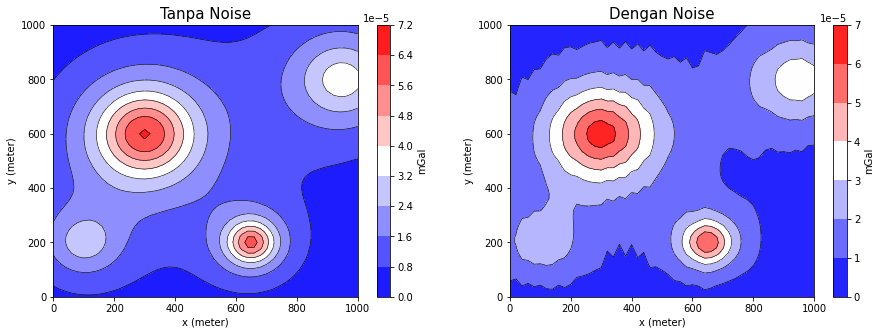

In [8]:
# plotting
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
contour1 = ax1.contourf(x1, y1, gz3d_tot, cmap="bwr")
contour2 = ax2.contourf(x1, y1, gz3d_tot_noise, cmap="bwr")

# Tambahkan garis hitam pada setiap interval dengan linewidth
ax1.contour(x1, y1, gz3d_tot, colors='k', linewidths=0.6)
ax2.contour(x1, y1, gz3d_tot_noise, colors='k', linewidths=0.6)

cbar1 = plt.colorbar(contour1, ax=ax1, label="mGal")
cbar2 = plt.colorbar(contour2, ax=ax2, label="mGal")

ax1.set_title("Tanpa Noise", size=15)
ax2.set_title("Dengan Noise", size=15)
ax1.set_ylabel("y (meter)")
ax2.set_ylabel("y (meter)")
ax1.set_xlabel("x (meter)")
ax2.set_xlabel("x (meter)")
plt.show()